In [2]:
import pandas as pd

import config

In [47]:
raw_df = pd.read_csv(config.RAW_STORM_DB_PATH)

In [ ]:
raw_df.columns

Index(['Storm', 'Life', 'Area', 'Initial UTC', 'Lon', 'Lat', 'Parent', 'Child',
       'Accreted', 'u', 'v', 'in_gha', 'gpm_mean', 'gpm_max', 'gpm_frac',
       'gpm_perc90', 'Min BT', 'Mean BT', 'Final UTC', 'timestamp',
       'mjo_amplitude', 'mjo_phase', 'rmm1', 'rmm2', 'lst', 'u_ms', 'v_ms',
       'LonInBounds', 'LatInBounds', 'in_domain', 'areaxgpm_mean', 'duration',
       'duration_hr', 'speed', 'mean_speed', 'east_africa_time', 'eat_hours'],
      dtype='object')

: 

: 

In [ ]:
raw_df[["Initial UTC", "Final UTC", "timestamp", "east_africa_time"]].head()

,Initial UTC,Final UTC,timestamp,east_africa_time
0,2014-01-02 14:15:00,2014-01-02 17:30:00,2014-01-02 14:15:00,2014-01-02 17:15:00
1,2014-01-02 14:15:00,2014-01-02 17:30:00,2014-01-02 14:30:00,2014-01-02 17:30:00
2,2014-01-02 14:15:00,2014-01-02 17:30:00,2014-01-02 14:45:00,2014-01-02 17:45:00
3,2014-01-02 14:15:00,2014-01-02 17:30:00,2014-01-02 15:00:00,2014-01-02 18:00:00
4,2014-01-02 14:15:00,2014-01-02 17:30:00,2014-01-02 15:15:00,2014-01-02 18:15:00


: 

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588915 entries, 0 to 588914
Data columns (total 37 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Storm             588915 non-null  int64  
 1   Life              588915 non-null  int64  
 2   Area              588915 non-null  int64  
 3   Initial UTC       588915 non-null  object 
 4   Lon               588915 non-null  float64
 5   Lat               588915 non-null  float64
 6   Parent            588915 non-null  object 
 7   Child             588915 non-null  object 
 8   Accreted          588915 non-null  object 
 9   u                 588915 non-null  float64
 10  v                 588915 non-null  float64
 11  in_gha            588915 non-null  bool   
 12  gpm_mean          151233 non-null  float64
 13  gpm_max           151233 non-null  float64
 14  gpm_frac          151233 non-null  float64
 15  gpm_perc90        151233 non-null  float64
 16  Min BT            58

: 

In [ ]:
raw_df["gpm_mean"].isna().sum() / raw_df.shape[0]

np.float64(0.7432006316701052)

: 

In [4]:
processed_df = pd.read_csv(
    config.PROCESSED_DATASET_PATH, parse_dates=["timestamp"]
)

In [ ]:
raw_df["timestamp"] = pd.to_datetime(raw_df["timestamp"])

: 

In [ ]:
# comparison_df = raw_df.merge(
#     processed_df,
#     left_on=["timestamp"],
#     right_on=["timestamp"],
#     how="inner",
# )

: 

In [ ]:
# comparison_df[
#     ["timestamp", "gpm_mean", "areaxgpm_mean", "mean_prcp_400"]
# ].head()

: 

In [ ]:
# comparison_df[["gpm_mean", "areaxgpm_mean", "mean_prcp_400"]].describe()

: 

In [6]:
processed_df[
    [
        "mean_u850",
        "mean_u500",
        "mean_u200",
        "mean_v850",
        "mean_v500",
        "mean_v200",
        "mean_u_shear_850_500",
        "mean_v_shear_850_500",
        "mean_u_shear_850_200",
        "mean_v_shear_850_200",
    ]
].describe()

,mean_u850,mean_u500,mean_u200,mean_v850,mean_v500,mean_v200,mean_u_shear_850_500,mean_v_shear_850_500,mean_u_shear_850_200,mean_v_shear_850_200
count,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000
mean,0.076921,-4.630917,-6.249896,1.187710,-1.522201,0.262749,-4.707838,-2.709911,-6.326817,-0.924961
std,2.960880,3.332656,9.879332,2.167353,2.132746,3.943631,4.101778,3.201645,11.454111,4.871262
min,-11.622867,-18.800264,-36.009590,-10.640975,-11.489190,-19.018194,-22.358397,-23.217394,-50.491158,-21.982794
25%,-1.538653,-6.830729,-13.503547,0.017006,-2.917770,-2.277809,-7.432822,-4.551898,-14.732636,-4.063760
50%,-0.063162,-4.782898,-6.241522,1.063729,-1.542419,0.113968,-4.773699,-2.598404,-6.003793,-1.108661
75%,1.249431,-2.573395,0.099753,2.215642,-0.159273,2.585159,-2.119585,-0.742230,1.287103,1.898399
max,18.830683,10.888374,36.084953,16.899387,10.305723,26.373779,15.218797,13.737514,38.593628,28.478954


In [49]:
processed_df[
    [
        "anor",
        "upslope_bearing",
        "slope_angle",
        "wind_direction",
        "wind_angle_upslope",
    ]
].describe()

,anor,upslope_bearing,slope_angle,wind_direction,wind_angle_upslope
count,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000
mean,0.086201,180.713728,0.416936,178.194937,175.270300
std,0.747206,106.638873,0.320806,91.912789,105.656103
min,-1.541977,0.038783,0.000051,0.001892,0.000000
25%,-0.530022,91.424872,0.170455,103.703003,82.627335
50%,0.119981,166.505623,0.336559,181.914902,169.626831
75%,0.764844,282.628990,0.589341,247.353706,269.891907
max,1.558138,359.978360,2.015448,359.999146,359.999390


In [12]:
processed_df[
    [
        "anor",
        "upslope_bearing",
        "slope_angle",
        "wind_direction",
        "wind_angle_upslope",
    ]
].describe()

,anor,upslope_bearing,slope_angle,wind_direction,wind_angle_upslope
count,588915.000000,588915.000000,588915.000000,588915.000000,588915.000000
mean,0.086201,179.358960,0.422738,178.194937,175.270300
std,0.747206,108.119432,0.323957,91.912789,105.656103
min,-1.541977,0.381363,0.000053,0.001892,0.000000
25%,-0.530022,75.987060,0.174229,103.703003,82.627335
50%,0.119981,191.879460,0.344243,181.914902,169.626831
75%,0.764844,268.418640,0.601930,247.353706,269.891907
max,1.558138,359.941560,1.969617,359.999146,359.999390


In [15]:
from utils import processing

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [16]:
geop, height = processing.load_geop_and_calc_elevation()

In [ ]:
type(height)

pint.registry.Quantity

: 

In [18]:
import pyproj

In [19]:
# initialize the geodesic calculator with WGS84 ellipsoid
# TODO: is there a better projection for East Africa?
geod = pyproj.Geod(ellps="WGS84")

In [20]:
_, _, dx = geod.inv(
    geop["longitude"].values[0],
    geop["latitude"].values[0],
    geop["longitude"].values[1],
    geop["latitude"].values[0],
)  # lon = x spacing
_, _, dy = geod.inv(
    geop["longitude"].values[0],
    geop["latitude"].values[0],
    geop["longitude"].values[0],
    geop["latitude"].values[1],
)  # lat = y spacing

In [28]:
geop["longitude"].values[0], geop["latitude"].values[0]

(np.float64(31.0), np.float64(16.0))

In [29]:
geop["longitude"].values[1], geop["latitude"].values[0]

(np.float64(31.25), np.float64(16.0))

In [30]:
geop["longitude"].values[0], geop["latitude"].values[1]

(np.float64(31.0), np.float64(15.75))

In [21]:
dx

26758.59475064042

In [22]:
dy

27664.352319844038

In [23]:
import numpy as np

In [24]:
dz_dx, dz_dy = np.gradient(height.magnitude, dx, dy)
upslope_angle = np.arctan2(dz_dy, dz_dx)  # radians from east [-pi, pi]

In [31]:
import metpy.calc as mpcalc

In [ ]:
dx_geo, dy_geo = mpcalc.lat_lon_grid_deltas(geop.longitude, geop.latitude)
dz_dx_geo, dz_dy_geo = mpcalc.geospatial_gradient(
    height.magnitude, dx=dx_geo, dy=dy_geo
)

In [ ]:
upslope_angle_geo = np.arctan2(
    dz_dy_geo, dz_dx_geo
)  # radians from east [-pi, pi]

In [40]:
upslope_angle_geo

Magnitude,[[3.050053678465297 2.9204202952508096 2.908180582679847 ... -2.1245137868947936 -1.1750596250684255 -0.9974836269107751] [3.032023853711237 3.0752870044701286 3.0928718659666665 ... 2.655766579225275 0.9021953805073343 1.1928312441975306] [3.019237200702383 -3.0705586729627017 -2.8579358751486117 ... -2.918486015476568 0.6999571949513569 0.5459944683239958] ... [-2.904402855819445 -2.985032662521671 1.6469055371016943 ... 1.9556807047626743 1.8067732973989266 0.48377393694543575] [3.0030700329176065 3.0300525647536563 -2.095692895416191 ... 2.3871940368594253 -2.0596740503319872 -0.42708235305827763] [2.455313622931862 2.5048192752277365 -1.047005993212421 ... -2.0067420523793222 -1.353235525355458 -1.7180783971425226]]
Units,radian


In [39]:
pd.DataFrame(
    {
        "dz_dx": dz_dx.flatten(),
        "dz_dy": dz_dy.flatten(),
        "upslope_angle": upslope_angle.flatten(),
        "dz_dx_geo": dz_dx_geo.flatten(),
        "dz_dy_geo": dz_dy_geo.flatten(),
        "upslope_angle_geo": upslope_angle_geo.flatten(),
    }
).describe()

,dz_dx,dz_dy,upslope_angle,dz_dx_geo,dz_dy_geo,upslope_angle_geo
count,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000,5073.000000
mean,-0.000130,-0.000261,-0.246623,-0.000268,0.000134,0.128896
std,0.004758,0.005106,1.830651,0.005210,0.004603,1.852591
min,-0.028641,-0.034241,-3.141236,-0.035119,-0.026237,-3.139376
25%,-0.001625,-0.001589,-1.957331,-0.001601,-0.000800,-1.495438
50%,-0.000010,-0.000019,-0.302129,-0.000020,0.000010,0.138889
75%,0.000826,0.000759,1.339203,0.000767,0.001622,1.868236
max,0.027257,0.027127,3.140947,0.028015,0.027569,3.141462


In [45]:
upslope_angle_geo.magnitude

array([[ 3.05005368,  2.9204203 ,  2.90818058, ..., -2.12451379,
        -1.17505963, -0.99748363],
       [ 3.03202385,  3.075287  ,  3.09287187, ...,  2.65576658,
         0.90219538,  1.19283124],
       [ 3.0192372 , -3.07055867, -2.85793588, ..., -2.91848602,
         0.69995719,  0.54599447],
       ...,
       [-2.90440286, -2.98503266,  1.64690554, ...,  1.9556807 ,
         1.8067733 ,  0.48377394],
       [ 3.00307003,  3.03005256, -2.0956929 , ...,  2.38719404,
        -2.05967405, -0.42708235],
       [ 2.45531362,  2.50481928, -1.04700599, ..., -2.00674205,
        -1.35323553, -1.7180784 ]], shape=(57, 89))

In [107]:
upslope_angle.min(), upslope_angle.max()

(np.float32(-3.141236), np.float32(3.1409469))

In [108]:
upslope_degrees = np.degrees(upslope_angle)

In [109]:
upslope_degrees.min(), upslope_degrees.max()

(np.float32(-179.97955), np.float32(179.96298))

In [97]:
from pint import Quantity

In [ ]:
upslope_bearings = (
    Quantity(90, "degrees") - np.degrees(upslope_angle)
) % Quantity(360, "degrees")

In [111]:
upslope_bearings = (90 - np.degrees(upslope_angle)) % 360

In [112]:
upslope_bearings.min(), upslope_bearings.max()

(np.float32(0.058921814), np.float32(359.94156))

In [25]:
# calculate slope angle for a measure of terrain steepness
# using slope magnitude as the hypotenuse of the gradient vector
slope_magnitude = np.sqrt(dz_dx**2 + dz_dy**2)
slope_angle = np.arctan(slope_magnitude)

In [26]:
slope_angle.min(), slope_angle.max()

(np.float32(9.260901e-07), np.float32(0.034376297))

In [27]:
# convert slope angle to degrees
slope_angle = np.degrees(slope_angle)

In [28]:
slope_angle.min(), slope_angle.max()

(np.float32(5.306105e-05), np.float32(1.9696167))

In [ ]:
dy * np.tan(np.radians(1.9696167))

np.float64(951.372760232305)

In [1]:
import xarray as xr

In [78]:
# load u and v wind components at 850 hPa (closest to ground)
u_wind = xr.open_dataset(config.DATA_DIR / "std" / f"uwnd_850_2014.nc").squeeze(
    dim="pressure_level"
)
v_wind = xr.open_dataset(config.DATA_DIR / "std" / f"vwnd_850_2014.nc").squeeze(
    dim="pressure_level"
)

# perform batch indexing for u and v wind components
group_lons = xr.DataArray(processed_df.iloc[:1000]["lon"].to_numpy())
group_lats = xr.DataArray(processed_df.iloc[:1000]["lat"].to_numpy())
group_timestamps = xr.DataArray(
    processed_df.iloc[:1000]["timestamp"].to_numpy()
)

# calculate the wind angle at each point
wind_angles = np.arctan2(
    v_wind["vwnd"]
    .sel(
        valid_time=group_timestamps,
        latitude=group_lats,
        longitude=group_lons,
        method="nearest",
    )
    .values,
    u_wind["uwnd"]
    .sel(
        valid_time=group_timestamps,
        latitude=group_lats,
        longitude=group_lons,
        method="nearest",
    )
    .values,
)

In [79]:
wind_angles.min(), wind_angles.max()

(np.float32(-3.1369822), np.float32(3.118423))

In [82]:
wind_bearings = (90 - np.degrees(wind_angles)) % 360

In [84]:
wind_bearings.min(), wind_bearings.max()

(np.float32(0.24340057), np.float32(359.305))

In [3]:
year = 2014

In [4]:
# load u and v wind components for all pressure levels
u_wind_850 = xr.open_dataset(
    config.DATA_DIR / "std" / f"uwnd_850_{year}.nc"
).squeeze(dim="pressure_level")
v_wind_850 = xr.open_dataset(
    config.DATA_DIR / "std" / f"vwnd_850_{year}.nc"
).squeeze(dim="pressure_level")
u_wind_500 = xr.open_dataset(
    config.DATA_DIR / "std" / f"uwnd_500_{year}.nc"
).squeeze(dim="pressure_level")
v_wind_500 = xr.open_dataset(
    config.DATA_DIR / "std" / f"vwnd_500_{year}.nc"
).squeeze(dim="pressure_level")
u_wind_200 = xr.open_dataset(
    config.DATA_DIR / "std" / f"uwnd_200_{year}.nc"
).squeeze(dim="pressure_level")
v_wind_200 = xr.open_dataset(
    config.DATA_DIR / "std" / f"vwnd_200_{year}.nc"
).squeeze(dim="pressure_level")

In [8]:
u_shear_850_500 = (u_wind_500["uwnd"] - u_wind_850["uwnd"]).to_dataset()
v_shear_850_500 = (v_wind_500["vwnd"] - v_wind_850["vwnd"]).to_dataset()

In [12]:
u_shear_850_200 = (u_wind_200["uwnd"] - u_wind_850["uwnd"]).to_dataset()
v_shear_850_200 = (v_wind_200["vwnd"] - v_wind_850["vwnd"]).to_dataset()

In [10]:
u_shear_850_500

<xarray.Dataset> Size: 181MB
Dimensions:     (valid_time: 8760, latitude: 58, longitude: 89)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 70kB 2014-01-01 ... 2014-12-31T23...
  * latitude    (latitude) float64 464B 16.15 15.9 15.65 15.4 ... 2.4 2.15 1.9
  * longitude   (longitude) float64 712B 31.0 31.25 31.5 ... 52.5 52.75 53.0
Data variables:
    uwnd        (valid_time, latitude, longitude) float32 181MB 11.04 ... -10.5

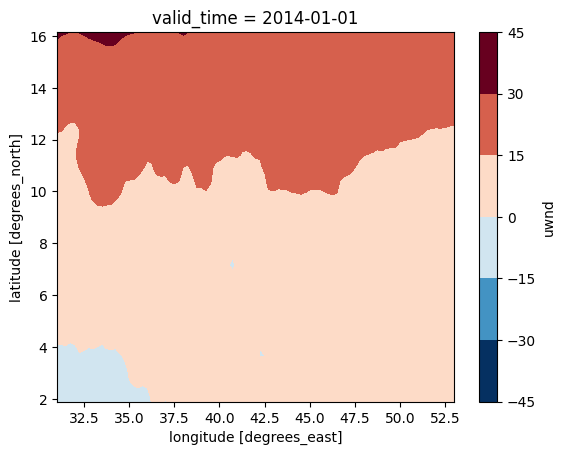

In [13]:
u_shear_850_200["uwnd"].isel(valid_time=0).plot.contourf()